In [82]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [83]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [84]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [85]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [86]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [87]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [88]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [89]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [90]:
#look at columns in station table

inspector = inspect(engine)

station_columns = inspector.get_columns('measurement')
for column in station_columns:
    print(column['name'], column['type'])
    
engine.execute('SELECT * FROM measurement LIMIT 3').all()

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0)]

In [91]:
#look at columns in station table
engine.execute('SELECT * FROM measurement LIMIT 3').fetchall()

station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column['name'], column['type'])
    
engine.execute('SELECT * FROM station LIMIT 3').all()

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)]

In [92]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date) \
.order_by(measurement.date.desc()).first()
print(f'The most recent date in the data set is {newest_date}')

The most recent date in the data set is ('2017-08-23',)


In [102]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# newest_date

# Calculate the date one year from the last date in data set.
last_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# last_date

# Perform a query to retrieve the data and precipitation scores
scores = session.query(measurement.date, measurement.prcp).filter \
    (measurement.date >= last_date). \
    order_by(measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
score_df = pd.DataFrame(scores, columns=['Date', 'Participation']) \
    .set_index('Date')


# Sort the dataframe by date
date_score_df = score_df.sort_values(by='Date')
date_score_df

,Participation
Date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,NaN
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


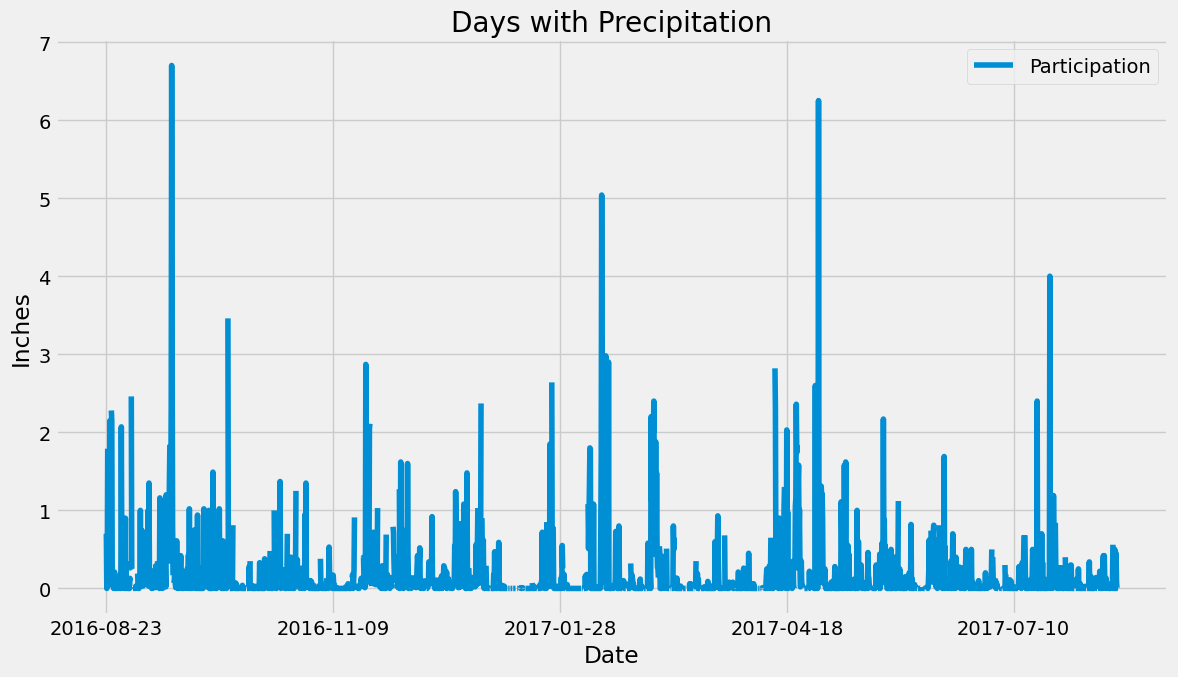

In [94]:
# Use Pandas Plotting with Matplotlib to plot the data
date_plot = date_score_df.plot(title = "Days with Precipitation", figsize=(12,7)).set(xlabel="Date", ylabel="Inches")
plt.tight_layout()
plt.show()

In [95]:
# Use Pandas to calcualte the summary statistics for the precipitation data
date_score_df.describe()

,Participation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [96]:
# Design a query to calculate the total number stations in the dataset
session.query(station.station).count()

9

In [97]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
best_stations = session.query(measurement.station, func.count(measurement.station)). \
    group_by(measurement.station). \
    order_by(func.count(measurement.station).desc()).all()
best_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [98]:
# Using the most active station id from the previous query, 
# calculate the lowest, highest, and average temperature.

most_active = best_stations[0][0]

active_statation_temp = session.query(func.min(measurement.tobs), \
                                      func.max(measurement.tobs), \
                                      func.avg(measurement.tobs)). \
                        filter(most_active == measurement.station).all()

print(f'-Active Station Records-')
print(f'Lowest temp: {round(active_statation_temp[0][0])}')
print(f'Highest temp: {round(active_statation_temp[0][1])}')
print(f'Average temp: {round(active_statation_temp[0][2])}')

-Active Station Records-
Lowest temp: 54
Highest temp: 85
Average temp: 72


In [99]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temps = session.query(measurement.station, measurement.date, measurement.tobs).\
    filter(measurement.station == most_active).\
    filter(measurement.date >= last_date).\
    order_by(measurement.date).all()

station_temps

[('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC00519281', '2016-09-13', 79.0),
 ('USC00519281', '2016-09-14', 75.0),
 ('USC00519281', '2016-09-15', 79.0),
 ('USC00519281', '2016-09-16', 78.0),
 ('USC00519281', '2016-09-17', 79.0),
 ('USC005192

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Temperature')]

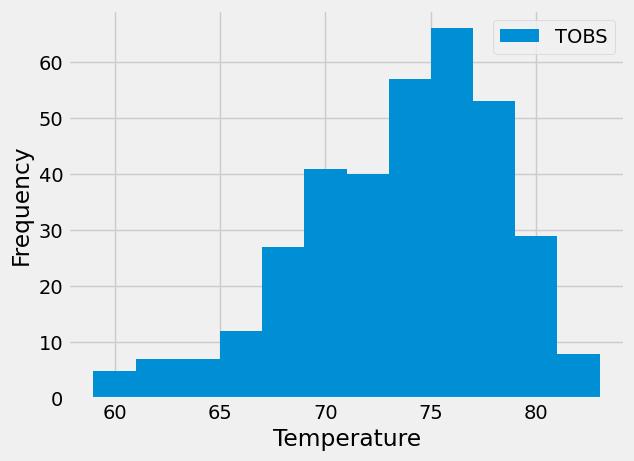

In [100]:
# Plot the results as a histogram with bins=12
temp_chart = pd.DataFrame(active_last_year_temps, \
                              columns=["Station", "Date", "TOBS"]).\
                                sort_values(by='Station', ascending=True)

temp_chart.set_index('Station')

temp_chart.plot.hist(bins=12).set(ylabel='Frequency', xlabel='Temperature')



# Close session

In [101]:
# Close Session
session.close()